In [13]:
"""Implement Bayes Classifier for Iris Dataset.

Dataset Specifications:

Total number of samples = 150

Number of classes = 3 (Iris setosa, Iris virginica, and Iris versicolor)

Number of samples in each class = 50

Use the following information to design classifier:

Number of training feature vectors ( first 40 in each class) = 40

Number of test feature vectors ( remaining 10 in each class) = 10

Number of dimensions = 4

Feature vector = <sepal length, sepal width, petal length, petal width>

Use only two features: Petal Length and Petal Width, for 3 class classification and draw the decision boundary between them (2 dimension, 3 regions also called as multi-class problem)
"""


'Implement Bayes Classifier for Iris Dataset.\n\nDataset Specifications:\n\nTotal number of samples = 150\n\nNumber of classes = 3 (Iris setosa, Iris virginica, and Iris versicolor)\n\nNumber of samples in each class = 50\n\nUse the following information to design classifier:\n\nNumber of training feature vectors ( first 40 in each class) = 40\n\nNumber of test feature vectors ( remaining 10 in each class) = 10\n\nNumber of dimensions = 4\n\nFeature vector = <sepal length, sepal width, petal length, petal width>\n\nUse only two features: Petal Length and Petal Width, for 3 class classification and draw the decision boundary between them (2 dimension, 3 regions also called as multi-class problem)\n'

In [29]:
import numpy as np
import sympy as sp
import pandas as pd
import matplotlib.pyplot as plt
from dataclasses import dataclass

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [31]:
path='/content/drive/MyDrive/CS21B2028/PR-ML-Lab/datasets/'
iris_df = pd.read_csv(path+'iris.csv').drop('Id', axis=1)
iris_df = iris_df[['PetalLengthCm', 'PetalWidthCm', 'Species']]
iris_df

,PetalLengthCm,PetalWidthCm,Species
0,1.4,0.2,Iris-setosa
1,1.4,0.2,Iris-setosa
2,1.3,0.2,Iris-setosa
3,1.5,0.2,Iris-setosa
4,1.4,0.2,Iris-setosa
...,...,...,...
145,5.2,2.3,Iris-virginica
146,5.0,1.9,Iris-virginica
147,5.2,2.0,Iris-virginica
148,5.4,2.3,Iris-virginica


In [32]:
@dataclass
class DiscriminantFunction:
    A: np.ndarray
    B: np.ndarray
    C: float

    def __call__(self, x: np.ndarray):
        return x.T.dot(self.A).dot(x) + self.B.T.dot(x) + self.C

    def __str__(self):
        x1, x2 = sp.symbols('x1 x2')
        X = sp.Matrix([x1, x2])
        A = sp.Matrix(self.A)
        B = sp.Matrix(self.B)
        C = self.C
        Xt_A_X = sp.det(X.T @ A @ X)
        Bt_X = sp.det(B.T @ X)
        return str(Xt_A_X + Bt_X + C).replace('**', '^')

In [33]:
def g_of_x(X: np.ndarray, prob: float):
    X_mean = X.mean(axis=0)
    X_cov = cov(X)
    X_cov_inv = np.linalg.inv(X_cov)
    X_cov_det = np.linalg.det(X_cov)

    A = -0.5 * X_cov_inv
    B = X_cov_inv.dot(X_mean)
    C = -0.5 * X_mean.T.dot(X_cov_inv).dot(X_mean) - 0.5 * np.log(X_cov_det) + np.log(prob)
    return DiscriminantFunction(A, B, C)

In [34]:
def cov(X: np.ndarray):
    X = X - X.mean(axis=0)
    return np.dot(X.T, X) / (X.shape[0]-1)

In [35]:
def split_train_test(df: pd.DataFrame):
    classes = df['Species'].unique()
    X_train, X_test = [], []
    for c in classes:
        df_c = df[df['Species'] == c]
        X_train.append(df_c.iloc[:40, :-1].values)
        X_test.append(df_c.iloc[40:, :-1].values)
    return np.array(X_train), np.array(X_test)

In [36]:
def discriminant_plot(g1, g2):
    x = np.linspace(0, 8, 100)
    y = np.linspace(-0.5, 3, 100)
    X, Y = np.meshgrid(x, y)
    Z = np.zeros_like(X)
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            Z[i, j] = g1(np.array([X[i, j], Y[i, j]])) - g2(np.array([X[i, j], Y[i, j]]))
    plt.contour(X, Y, Z, levels=[0])

In [37]:
def plot_data(X, color='b'):
    plt.scatter(X[:, 0], X[:, 1], c=color)

In [38]:
X_train, X_test = split_train_test(iris_df)
X_data = np.concatenate((X_train, X_test), axis=1)

gi = [g_of_x(X, 1/3) for X in X_train]
for i in range(3):
    print(f'g{i+1}(x) = {gi[i]}')

g1(x) = x1*(-18.2013769363167*x1 + 8.39070567986231*x2) + 49.3373493975904*x1 + x2*(8.39070567986231*x1 - 54.158191206384*x2) + 0.640744797371311*x2 - 33.1482353430116
g2(x) = x1*(-6.46179973746472*x1 + 11.0581394316733*x2) + 25.9406642674901*x1 + x2*(11.0581394316733*x1 - 30.531042182179*x2) - 13.0532201006154*x2 - 45.4351862534975
g3(x) = x1*(-1.67808553475827*x1 + 1.34026651999167*x2) + 13.4854685227472*x1 + x2*(1.34026651999167*x1 - 7.8038799933497*x2) + 16.0283533518252*x2 - 52.9511902778155


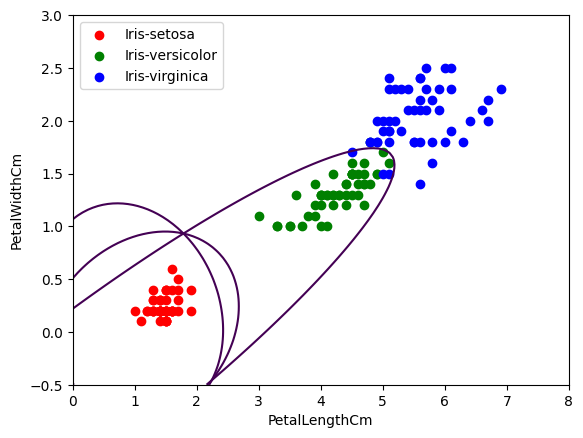

In [39]:
for i, j in [(0, 1), (0, 2), (1, 2)]:
    discriminant_plot(gi[i], gi[j])
for i in range(3):
    plot_data(X_data[i], color='rgb'[i])
plt.legend(iris_df['Species'].unique())
plt.xlabel('PetalLengthCm')
plt.ylabel('PetalWidthCm')
plt.show()